In [2]:
import os 
os.chdir(r"E:/ENMARTZ/SEMESTRE 10/Optimización Convexa/Proyecto/admm-matrix-completion-main")

from data import load_data, load_gif_data
from core.utils import Mask

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat

data = loadmat('./imgs/test/final_testing/All_images.mat')
masks = np.float32(data['mask'])
corrupteds = np.float32(data['y'])

In [3]:
for i in range(8):
    corrupteds[..., i] = corrupteds[..., i] / np.max(corrupteds[..., i])

iteration 49 | time 6.7578


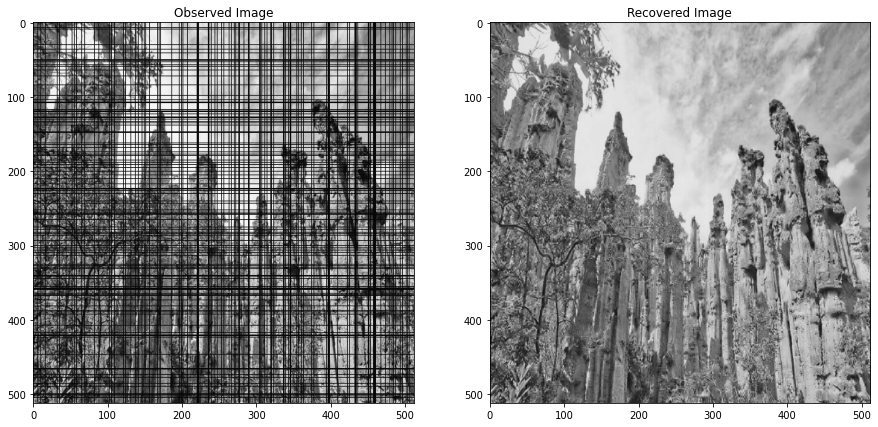

In [5]:
from core.admm import ADMM

iters = 50
rho = 0.0005
tau = 1.2e-05	
lambd = 0.0002

admm = ADMM()
estimated = np.zeros(corrupteds.shape)
for i in range(8):
    print(f"Sample {i}")
    estimated[..., i] = admm.restore(corrupteds[..., i], masks[..., i], sol=None, iters=iters, rho=rho, tau=tau, lambd=lambd)

savemat("imgs/test/final_testing/estimated.mat", dict(estimated=estimated))

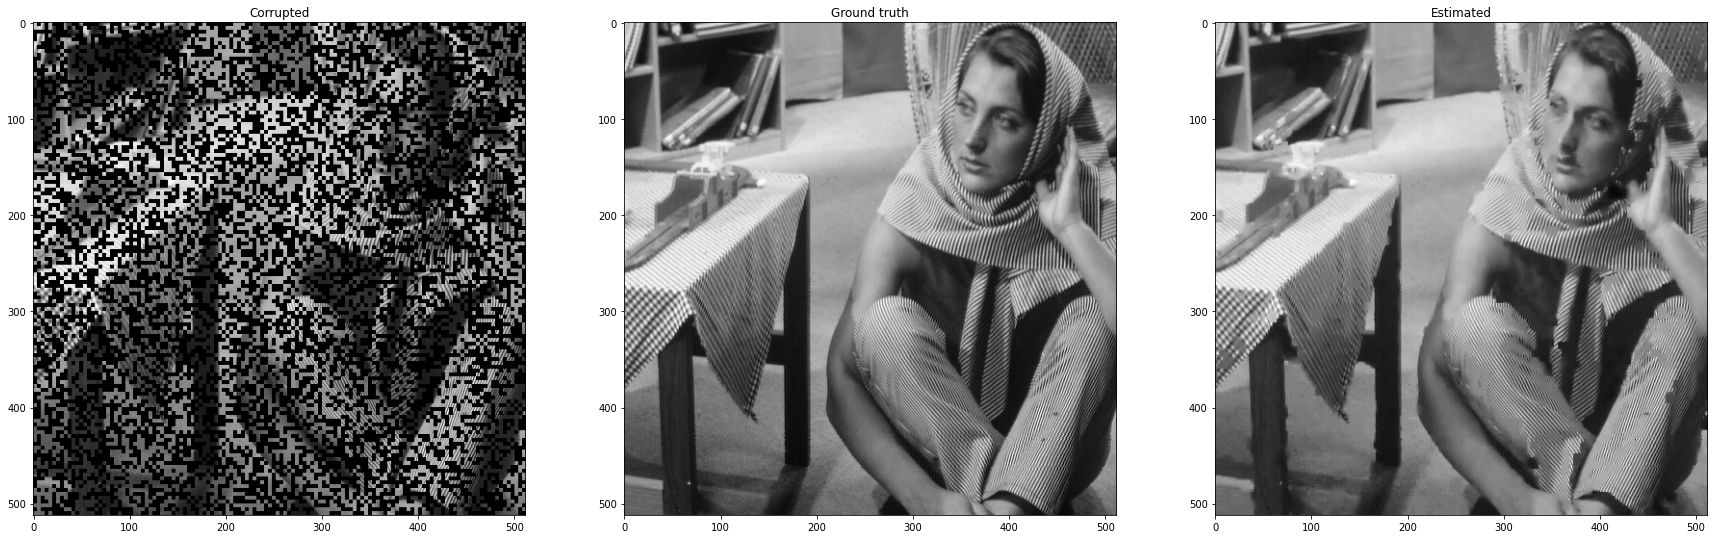

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(30, 15))

axs[0].set_title("Corrupted")
axs[0].imshow(corrupted, cmap='gray')

axs[1].set_title("Ground truth")
axs[1].imshow(image, cmap='gray')

axs[2].set_title("Estimated")
axs[2].imshow(estimated, cmap='gray')


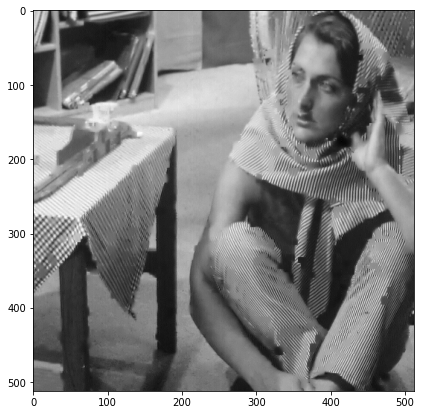

In [6]:
image2 = corrupted + (1 - mask) * estimated

plt.figure(figsize=(15, 7))
plt.imshow(image2, cmap="gray")

In [7]:
from core.utils import psnr

# performance

print(f"PSNR corrupted image: {psnr(image, corrupted)}")
print(f"PSNR estimated image: {psnr(image, estimated)}")

PSNR corrupted image: 8.861546929040395
PSNR estimated image: 27.086076529004046
